# Table of Contents
 <p><div class="lev2"><a href="#理論"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>理論</a></div><div class="lev3"><a href="#マルコフ確率場"><span class="toc-item-num">0.1.1&nbsp;&nbsp;</span>マルコフ確率場</a></div><div class="lev3"><a href="#教師なし学習"><span class="toc-item-num">0.1.2&nbsp;&nbsp;</span>教師なし学習</a></div><div class="lev4"><a href="#Gradient-Ascentによる最適化"><span class="toc-item-num">0.1.2.1&nbsp;&nbsp;</span>Gradient Ascentによる最適化</a></div><div class="lev2"><a href="#scikit-learnでやってみる"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>scikit learnでやってみる</a></div><div class="lev2"><a href="#Deep-Learning-tutorial"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>Deep Learning tutorial</a></div><div class="lev3"><a href="#Energy-based-models"><span class="toc-item-num">0.3.1&nbsp;&nbsp;</span>Energy based models</a></div><div class="lev2"><a href="#自前で実装"><span class="toc-item-num">0.4&nbsp;&nbsp;</span>自前で実装</a></div><div class="lev2"><a href="#応用など"><span class="toc-item-num">0.5&nbsp;&nbsp;</span>応用など</a></div><div class="lev3"><a href="#よく分からないこと"><span class="toc-item-num">0.5.1&nbsp;&nbsp;</span>よく分からないこと</a></div>

## 理論
http://image.diku.dk/igel/paper/AItRBM-proof.pdf

### マルコフ確率場
マルコフ確率場とは : 

無向グラフ $G=(V,E)$ Vがノード、Eがエッジの集合。clique(クリーク)は、全結合であるVの部分集合を表す。そのcliqueにそれ以上ノードを加えると、cliqueでなくなってしまうときcliqueがmaximalであるという。$\mathcal{C}$で最大クリークの集合を表す。

ある部分集合$\mathcal{V}\in Vは$ふたつのノード$v,w \notin \mathcal{V}$を結ぶ経路に必ず$\mathcal{V}$のノードを含むとき、$v,w$を分離しているという。

各ノード上に確率変数$X_v$をおく。結合分布pがグラフに関してマルコフ性を満たす、すなわち、任意の互いに素な部分集合$\mathcal{A,B,S}\in V$に対して、$\mathcal{A,B}$の全てのノードが$\mathcal{S}$によって分離されているとき、$(X_s)_{s\in\mathcal{S}}$が与えられた時、$(X_a)_{a\in\mathcal{A}}$と$(X_b)_{b\in\mathcal{B}}$は条件付き独立である。

とき、$X$はマルコフ確率場(MRF)であるという。



Hammersley-Clifford THeorem : すべての値に対して正の確率をもつ分布pに対して、もし、Gに対してpを周辺化したとき？undirected graph Gに関してマルコフ性を満たす

w.r.t. : with respect to

ある分布がundirected graph Gについてwith maximal cliques C factorizeしているとは、
非負関数の集合$\{\phi_C\}_{C\in \mathcal{C}}$

$$p(x)=\frac{1}{Z}\Pi_{C\in \mathcal{C}} \psi_C(x)$$


正規化定数 $Z=\sum_x \Pi_{C\in\mathcal{C}} \psi_C (x_C)$ を分配関数と呼ぶ

### 教師なし学習
確率分布のパラメーターを推定すること。

MRFのギブス分布は最尤推定値を解析的に求められない

未知の分布qからデータ$S=\{x_1, \cdots, x_l\}$ がサンプルされたとする。

MRFのパラメーターの最尤推定は、未知の分布qとMRFの分布pのKLを最小化するということ

#### Gradient Ascentによる最適化

$$\theta^{(t+1)} = \theta^{(t)}+\Delta \theta^{(t)}$$

$$\Delta \theta^{(t)} = \eta$$



じゃあ具体的にMRFであるもの、ないものの例は？？
条件付き

有向
$P(x_1,x_2) = P(x_1|x_2) P(x_2)$



RBMとは浅い2層のニューラルネット

visible layerとhidden layer

確率的に出力する



$P(v,h|\theta):=$

で確率分布を定義する。なんで？

visible層が与えられたときの$\theta$を最尤推定する

$\hat{\theta} = \mathrm{arg max}_{\theta}f(\theta)=\mathrm{arg max}_{\theta}P(V|\theta)$

電脳化でやりたいのは、隠れ層の数を増減させたり、多分可視層の数を増減させたときの周辺確率をもとの確率分布に対して変わらないようにする

どうやって最尤推定するか？ scikit learnでは、Stochastic maximum likelihood aka Persistent Constrastive Divergenceを使っている

## scikit learnでやってみる

http://scikit-learn.org/stable/auto_examples/neural_networks/plot_rbm_logistic_classification.html#sphx-glr-auto-examples-neural-networks-plot-rbm-logistic-classification-py

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.ndimage import convolve
from sklearn import linear_model, datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline

In [27]:
def nudge_dataset(X, Y):
    """
    This produces a dataset 5 times bigger than the original one,
    by moving the 8x8 images in X around by 1px to left, right, down, up
    """
    direction_vectors = [
        [[0, 1, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [1, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 1],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 1, 0]]]    
    shift = lambda x, w: convolve(x.reshape((8,8)), mode='constant', weights=w).ravel()
    X = np.concatenate([X] + [np.apply_along_axis(shift, 1, X, vector)
                             for vector in direction_vectors])
    Y = np.concatenate([Y for _ in range(5)], axis=0)
    return X, Y
    

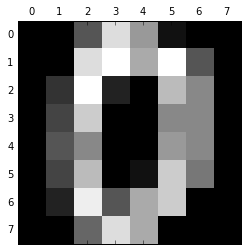

In [28]:
# load data
digits = datasets.load_digits()
# 8x8 = 64 dim. vectors of value 0-16 with label for 0, ... 10
plt.matshow(digits.images[0])

In [29]:
print(digits.images[0].shape)
print(digits.data[0].shape)
print(digits.target[0])

(8, 8)
(64,)
0


In [30]:
X = np.asarray(digits.data, 'float32')
X, Y = nudge_dataset(X, digits.target)

In [32]:
X = (X - np.min(X, 0)) / (np.max(X, 0) + 0.0001) # 0 - 1 scaling
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [36]:
# Models we use
logistic = linear_model.LogisticRegression()
rbm = BernoulliRBM(random_state=0, verbose=True)
classifier = Pipeline(steps=[('rbm', rbm), ('logistic', logistic)])

Training

In [38]:
# Hyper parameters. These were set by cross-validation
rbm.learning_rate = 0.06
rbm.n_iter = 20
rbm.n_components = 100
logistic.C = 6000.0

# Train RBM Logistic pipeline
classifier.fit(X_train, Y_train)
# Train logistic regression
logistic_classifier = linear_model.LogisticRegression(C=100.0)
logistic_classifier.fit(X_train, Y_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -25.39, time = 0.23s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -23.77, time = 0.41s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -22.94, time = 0.28s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -21.91, time = 0.27s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -21.69, time = 0.27s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -21.06, time = 0.26s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -20.89, time = 0.27s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -20.64, time = 0.26s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -20.36, time = 0.27s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -20.09, time = 0.26s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -20.08, time = 0.26s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -19.82, time = 0.26s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -19.64, time = 0.27s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -19.61, time = 0.26s
[BernoulliRBM] Iteration 15, 

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Evaluation

In [39]:
print("Logistic regression using RBM features:\n%s\n" % (
    metrics.classification_report(
        Y_test,
        classifier.predict(X_test))))

print("Logistic regression using raw pixel features:\n%s\n" % (
    metrics.classification_report(
        Y_test,
        logistic_classifier.predict(X_test))))

Logistic regression using RBM features:
             precision    recall  f1-score   support

          0       0.99      0.99      0.99       174
          1       0.92      0.95      0.93       184
          2       0.95      0.98      0.97       166
          3       0.97      0.91      0.94       194
          4       0.97      0.95      0.96       186
          5       0.93      0.93      0.93       181
          6       0.98      0.97      0.97       207
          7       0.95      1.00      0.97       154
          8       0.90      0.88      0.89       182
          9       0.91      0.93      0.92       169

avg / total       0.95      0.95      0.95      1797


Logistic regression using raw pixel features:
             precision    recall  f1-score   support

          0       0.85      0.94      0.89       174
          1       0.57      0.55      0.56       184
          2       0.72      0.85      0.78       166
          3       0.76      0.74      0.75       194
        

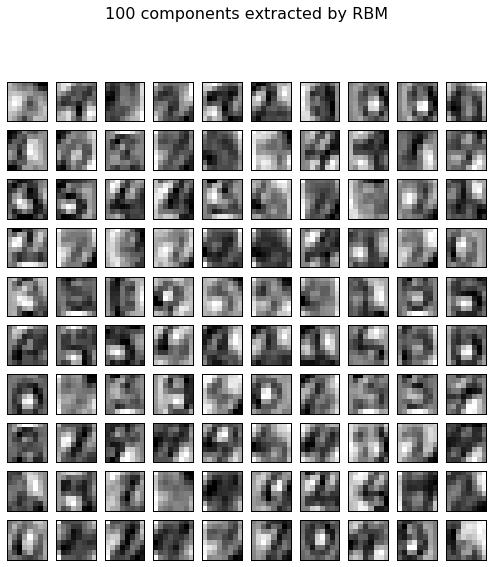

In [41]:
plt.figure(figsize=(8, 8))
for i, comp in enumerate(rbm.components_):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((8, 8)), cmap=plt.cm.gray_r,
               interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.suptitle('100 components extracted by RBM', fontsize=16)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)

## Deep Learning tutorial
http://deeplearning.net/tutorial/rbm.html

### Energy based models

$$p(x)=\frac{e^{-E(x)}}{Z}$$

観測できない変数があるとき

$$P(x)=\sum_h P(x,h)=\sum_h \frac{e^{-E(x)}}{Z}$$

となるので、自由エネルギー

$$\mathcal{F}(x):= -\log \sum_h e^{-E(x,h)}$$

を導入すると、

$$P(x)  = $$

## 自前で実装
scikit learnのコードを読みながら

In [ ]:
class MyBernoulliRBM():
    def __init__(self, n_componets)

## 応用など
動画をぶちこんでみる



### よく分からないこと
ベルヌーイ分布なのに、そこに16この値をとる入力を入れられるのはなぜ？

パラメーター

contrustive divergence?

エネルギーと確率の関係？